In [2]:
# Manipulation
import pandas as pd
import numpy as np

# Vizualisation
from IPython.display import display
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import MDS

In [3]:
# Load data
data = pd.read_csv("data/ipoker.csv", encoding = "latin-1", sep = "\t", index_col = False)
display(data)

,PlayerName,Hands,VP$IP,PFR,3Bet,PostflopAgg%,W$WSF%,WTSD%,Won$atSD,FlopCBet%,...,RaiseRiverCBet,Squeeze,RaiseTwoRaisers,CallTwoRaisers,vs3BetFold,vs3BetCall,vs3BetRaise,vs4BetFold,vs4BetCall,vs4BetRaise
0,Chiens,172732,0.239,0.193,0.070,0.310,0.443,0.265,0.509,0.538,...,0.108,0.073,0.029,0.010,0.641,0.250,0.109,0.497,0.195,0.309
1,Crixxus,164265,0.203,0.180,0.076,0.406,0.497,0.292,0.498,0.697,...,0.044,0.070,0.031,0.009,0.646,0.194,0.160,0.522,0.159,0.319
2,galaxyPro,152374,0.239,0.203,0.105,0.405,0.530,0.290,0.501,0.647,...,0.052,0.077,0.025,0.031,0.543,0.333,0.126,0.443,0.258,0.298
3,MesExcuses,126763,0.235,0.187,0.057,0.249,0.414,0.308,0.559,0.472,...,0.070,0.055,0.023,0.027,0.537,0.325,0.139,0.477,0.237,0.287
4,synaptik,123902,0.252,0.202,0.087,0.371,0.489,0.279,0.502,0.651,...,0.096,0.061,0.028,0.014,0.578,0.307,0.117,0.527,0.261,0.212
5,DrGiggy,113752,0.235,0.183,0.071,0.312,0.426,0.271,0.500,0.586,...,0.164,0.050,0.038,0.018,0.590,0.295,0.116,0.552,0.220,0.228
6,myfortune,89490,0.229,0.184,0.079,0.416,0.522,0.272,0.495,0.708,...,0.092,0.057,0.020,0.012,0.548,0.296,0.159,0.390,0.296,0.314
7,magma51,86107,0.276,0.215,0.079,0.256,0.418,0.284,0.561,0.500,...,0.083,0.076,0.040,0.008,0.560,0.326,0.115,0.489,0.259,0.253
8,lechasseur,83409,0.232,0.172,0.067,0.340,0.448,0.290,0.496,0.694,...,0.129,0.064,0.035,0.018,0.570,0.258,0.172,0.395,0.277,0.327
9,CerBerus,76928,0.226,0.181,0.087,0.424,0.530,0.272,0.493,0.714,...,0.080,0.075,0.031,0.013,0.555,0.283,0.163,0.462,0.249,0.289


In [4]:
# Remove unnecessary columns
y = data.iloc[:, 0]
X = data.drop(["PlayerName", "Hands"], axis = 1)

In [5]:
# Standardize features
stdSc = StandardScaler()
Xstd = pd.DataFrame(data = stdSc.fit_transform(X), columns = X.columns)
display(Xstd.head())

,VP$IP,PFR,3Bet,PostflopAgg%,W$WSF%,WTSD%,Won$atSD,FlopCBet%,TurnCBet%,RiverCBet%,...,RaiseRiverCBet,Squeeze,RaiseTwoRaisers,CallTwoRaisers,vs3BetFold,vs3BetCall,vs3BetRaise,vs4BetFold,vs4BetCall,vs4BetRaise
0,0.198,0.336,-0.583,-0.946,-0.733,-0.430,-0.059,-1.376,0.770,0.465,...,0.423,0.255,0.026,-0.492,1.029,-0.574,-1.005,0.062,-0.454,0.444
1,-1.549,-0.481,-0.057,1.100,0.826,1.359,-0.359,0.910,-1.632,-0.756,...,-1.035,-0.013,0.172,-0.632,1.113,-1.413,0.912,0.461,-0.999,0.622
2,0.230,0.904,2.582,1.089,1.786,1.234,-0.292,0.195,0.965,-0.790,...,-0.847,0.539,-0.488,1.765,-0.554,0.664,-0.374,-0.780,0.514,0.269
3,0.036,-0.039,-1.772,-2.247,-1.570,2.427,1.413,-2.331,-0.764,0.112,...,-0.447,-1.239,-0.703,1.387,-0.641,0.548,0.109,-0.257,0.190,0.065
4,0.837,0.826,0.977,0.366,0.604,0.513,-0.244,0.258,-0.197,-0.084,...,0.154,-0.737,-0.157,-0.040,0.018,0.279,-0.729,0.545,0.558,-1.219


In [6]:
# Compute distance matrix between each pair of rows
dist = euclidean_distances(Xstd, Xstd)
distDF = pd.DataFrame(data = np.round(dist, 2), index = y, columns = y)
display(distDF)

PlayerName,Chiens,Crixxus,galaxyPro,MesExcuses,synaptik,DrGiggy,myfortune,magma51,lechasseur,CerBerus,...,MoSeS,Myrtouns,JCOMPRENPAS,SALUTCOPAIN,Easygame88,Fatality,AllAhouAkbArrrr,monAAmourDZ,ViveLePorc2A,lapinoupowwer
PlayerName,,,,,,,,,,,,,,,,,,,,,
Chiens,0.000,7.390,7.150,5.860,4.690,4.350,6.180,5.120,5.170,7.010,...,3.470,7.210,4.690,4.810,5.200,7.030,5.340,8.410,5.330,7.310
Crixxus,7.390,0.000,7.340,9.290,6.350,8.330,6.140,9.350,6.590,5.930,...,8.210,10.140,7.630,7.990,8.690,5.900,6.670,9.780,7.800,2.800
galaxyPro,7.150,7.340,0.000,8.310,4.460,7.530,4.780,7.680,6.490,4.300,...,8.600,6.630,7.160,5.430,8.300,7.790,6.520,7.640,6.180,7.470
MesExcuses,5.860,9.290,8.310,0.000,6.730,5.820,8.020,5.210,5.980,9.230,...,6.200,9.140,6.510,6.340,7.870,10.220,8.190,8.280,8.010,9.100
synaptik,4.690,6.350,4.460,6.730,0.000,4.600,4.420,5.500,5.100,5.000,...,6.100,5.850,4.960,3.880,6.180,6.530,4.170,7.370,4.350,6.720
DrGiggy,4.350,8.330,7.530,5.820,4.600,0.000,6.680,5.720,4.930,7.650,...,4.700,7.260,4.810,6.190,6.560,8.380,5.500,7.800,6.220,7.800
myfortune,6.180,6.140,4.780,8.020,4.420,6.680,0.000,8.180,4.450,3.490,...,7.350,7.080,6.010,5.810,8.370,6.680,4.600,8.060,6.770,5.900
magma51,5.120,9.350,7.680,5.210,5.500,5.720,8.180,0.000,6.640,8.630,...,6.300,7.520,5.430,5.050,5.100,9.820,7.470,7.800,6.730,9.470
lechasseur,5.170,6.590,6.490,5.980,5.100,4.930,4.450,6.640,0.000,5.860,...,6.010,7.190,4.260,5.620,7.020,7.480,5.200,7.760,6.710,6.330


In [7]:
display(np.mean(dist))

6.8187634100929495

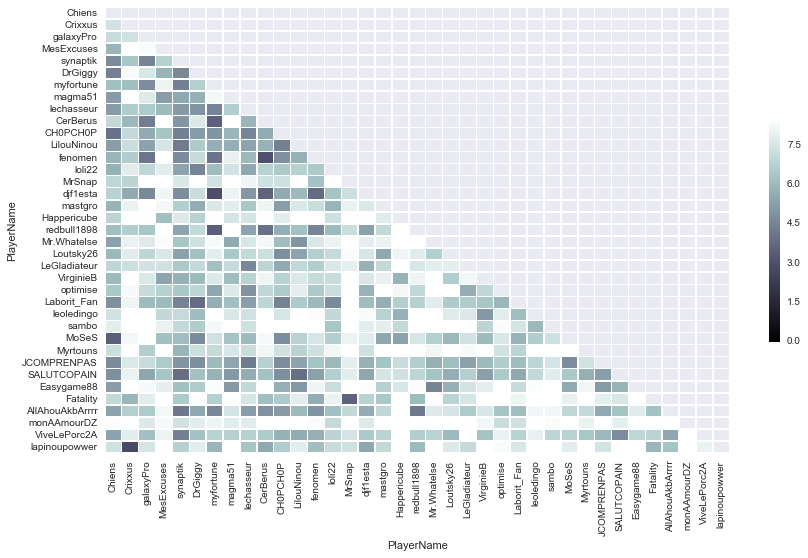

In [8]:
# Plot a pretty distance matrix
mask = np.zeros_like(distDF, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (14, 8))
sns.heatmap(distDF, 
            mask = mask, 
            cmap = "bone", 
            linewidths = .5, 
            vmax = 8.5,
            cbar_kws = {"shrink": .5})

Only plot distance < 3


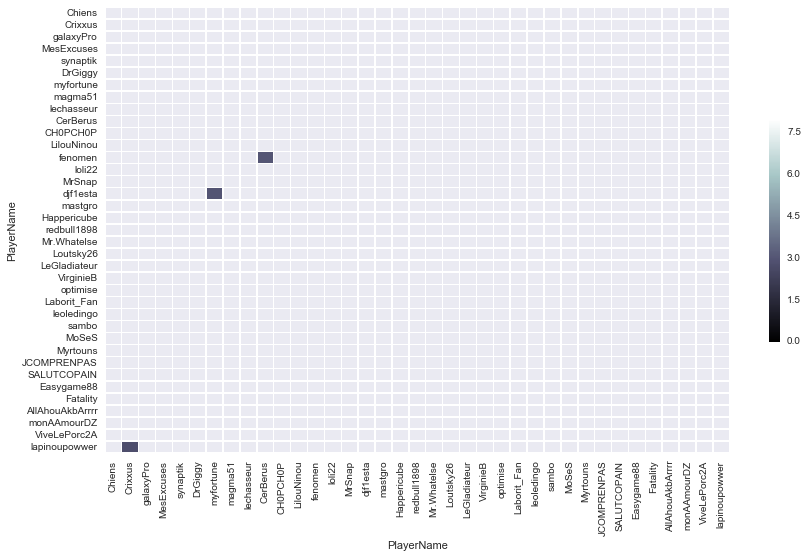

In [10]:
# Only plot distance < 3
print("Only plot distance < 3")
mask = dist > 3
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (14, 8))
sns.heatmap(distDF, 
            mask = mask, 
            cmap = "bone", 
            linewidths = .5, 
            vmax = 8,
            cbar_kws = {"shrink": .5})

Only plot distance < 3.75


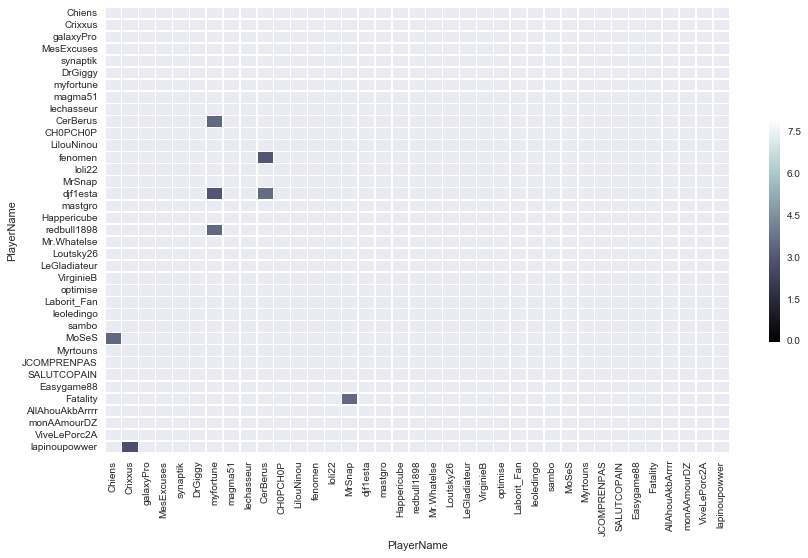

In [25]:
# Only plot distance < 3.75
print("Only plot distance < 3.75")
mask = dist > 3.75
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (14, 8))
sns.heatmap(distDF, 
            mask = mask, 
            cmap = "bone", 
            linewidths = .5, 
            vmax = 8,
            cbar_kws = {"shrink": .5})

In [12]:
display(distDF["Crixxus"].sort_values().head(10))
display(distDF["myfortune"].sort_values().head(10))

PlayerName
Crixxus         0.000
lapinoupowwer   2.800
djf1esta        5.570
Fatality        5.900
CerBerus        5.930
myfortune       6.140
synaptik        6.350
fenomen         6.550
lechasseur      6.590
redbull1898     6.630
Name: Crixxus, dtype: float64

PlayerName
myfortune         0.000
djf1esta          2.980
redbull1898       3.480
CerBerus          3.490
fenomen           4.040
synaptik          4.420
lechasseur        4.450
AllAhouAkbArrrr   4.600
galaxyPro         4.780
CH0PCH0P          4.970
Name: myfortune, dtype: float64

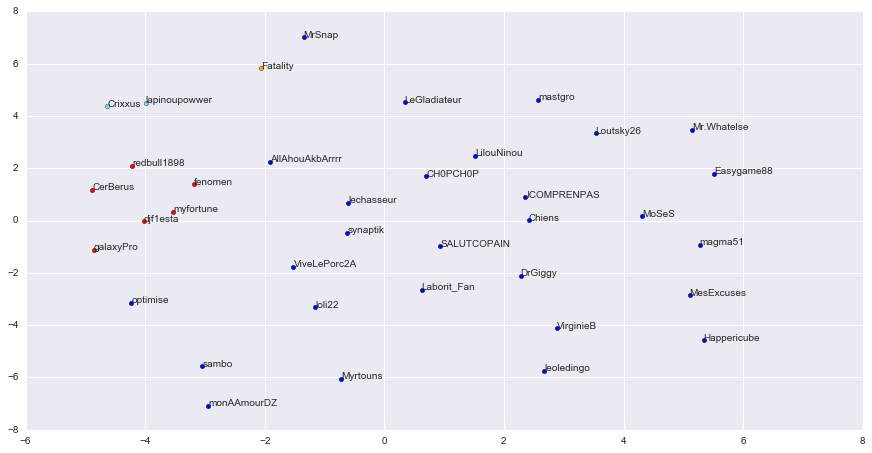

In [20]:
plt.figure(figsize = (15, 7.5))
mds = MDS(n_components = 2, dissimilarity = "precomputed", random_state = 1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]
names = distDF.columns
for x, y, name in zip(xs, ys, names):
    color = "blue"
    if name in ["galaxyPro", "myfortune", "CerBerus", "fenomen", "djf1esta", "djf1esta", "redbull1898"]:
        color = "red"
    if name in ["Crixxus", "lapinoupowwer"]:
        color = "skyblue"
    if name in ["Fatality"]:
        color = "orange"
    plt.scatter(x, y, c = color)
    plt.text(x, y, name)
plt.show()